<a href="https://colab.research.google.com/github/VardanDavtyan/ML-DL/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime, timedelta


# The tech stocks we'll use for this analysis
tech_list = ['BTC', 'AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['BTC', 'AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [BTC, AAPL, GOOG, MSFT, AMZN]
company_name = ["BITCOIN", "APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-08-16,137.190002,137.270004,135.009995,135.070007,135.070007,41675900,AMAZON
2023-08-17,135.460007,136.089996,133.529999,133.979996,133.979996,48354100,AMAZON
2023-08-18,131.619995,134.070007,131.149994,133.220001,133.220001,48469400,AMAZON
2023-08-21,133.740005,135.190002,132.710007,134.679993,134.679993,41442500,AMAZON
2023-08-22,135.080002,135.649994,133.729996,134.250000,134.250000,32935100,AMAZON
2023-08-23,134.500000,135.949997,133.220001,135.520004,135.520004,42801000,AMAZON
2023-08-24,136.399994,136.779999,131.830002,131.839996,131.839996,43646300,AMAZON
2023-08-25,132.470001,133.869995,130.580002,133.259995,133.259995,44124800,AMAZON
2023-08-28,133.779999,133.949997,131.850006,133.139999,133.139999,34083100,AMAZON


In [ ]:
BTC.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,91.421602,91.456167,91.390174,91.423050,91.423050,3145.418327
std,1.114237,1.109424,1.120321,1.114532,1.114532,13249.621423
min,88.609001,88.609001,88.609001,88.609001,88.609001,1.000000
25%,90.610050,90.702450,90.610050,90.676899,90.676899,42.500000
50%,91.564903,91.584999,91.527000,91.554199,91.554199,226.000000
75%,92.166550,92.197498,92.138702,92.168201,92.168201,1366.000000
max,93.959900,93.959900,93.894997,93.894997,93.894997,119712.000000


In [ ]:
BTC.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-08-09,93.561600,93.611603,93.561600,93.611603,93.611603,403,BITCOIN
2022-08-10,93.900002,93.900002,93.894997,93.894997,93.894997,236,BITCOIN
2022-08-11,93.556099,93.556099,93.556099,93.556099,93.556099,18,BITCOIN
2022-08-12,93.712997,93.712997,93.712997,93.712997,93.712997,7,BITCOIN
2022-08-15,93.959900,93.959900,93.874298,93.874298,93.874298,157,BITCOIN


In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-09 to 2023-08-08
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean() #rolling() clusters data by groups of length ma, and allows us doing math calculations with that groups


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change() #pct_change() is percentage change between current and previous element
tech_rets.head()

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area) # std() - standart deviation
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# **Predicting**

In [ ]:
# Get the stock quote
df = pdr.get_data_yahoo('BTC-USD', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-08-25,26163.679688,26248.103516,25786.812500,26047.667969,26047.667969,12406045118
2023-08-26,26047.234375,26107.384766,25983.878906,26008.462891,26008.462891,6034817316
2023-08-27,26008.242188,26165.373047,25965.097656,26089.693359,26089.693359,6913768611


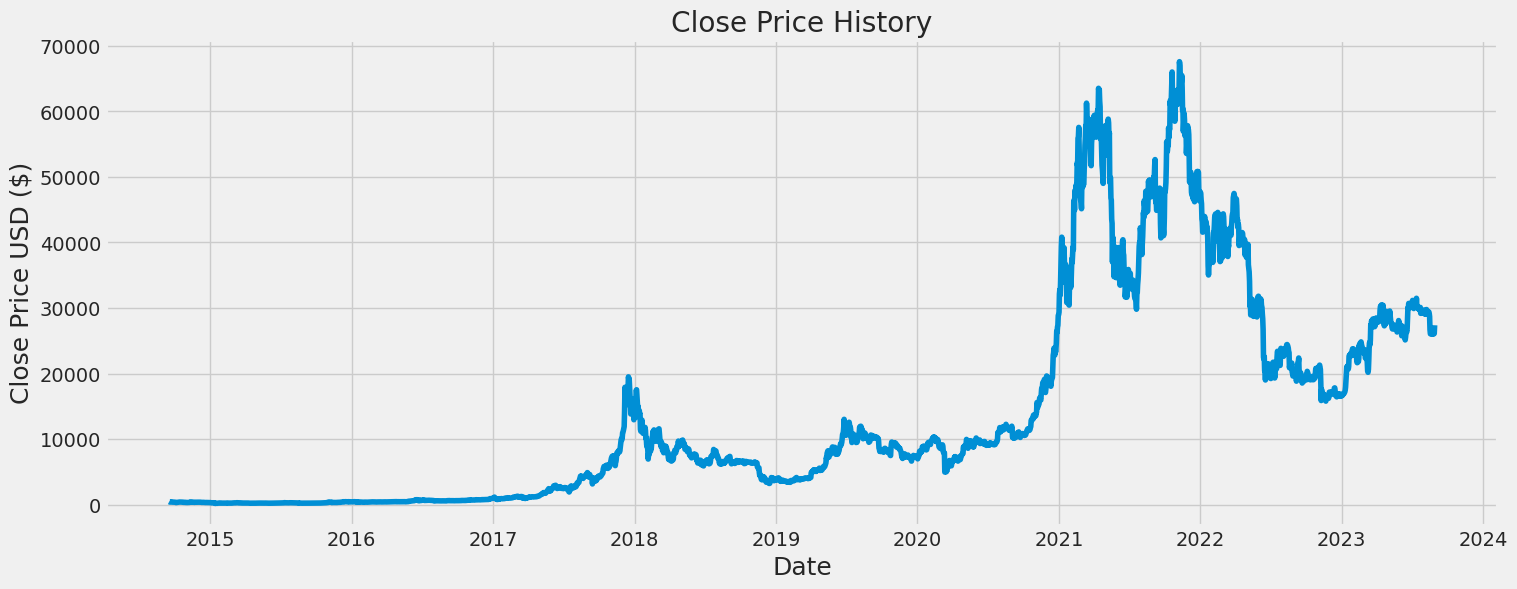

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

3106

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.38450928],
       [0.38475349],
       [0.40342026]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()


# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.00292874, 0.00309905, 0.00304965,
       0.00292288, 0.00269198, 0.00223721, 0.00211322, 0.00225521,
       0.00234585, 0.00259445, 0.0027738 , 0.0027224 , 0.00273334,
       0.00297447, 0.00315054, 0.0033057 , 0.00321523, 0.00303393,
       0.00305177, 0.0031658 , 0.00313766, 0.00303822, 0.00309209,
       0.00304287, 0.00267573, 0.00267466, 0.00251033, 0.00262063,
       0.00259518, 0.00266387, 0.00233701, 0.00248116, 0.00237752,
       0.00219096, 0.00219308, 0.00221774, 0.00226134, 0.00239481,
       0.00254029, 0.00243827, 0.00248387, 0.00274766, 0.00280197,
       0.00281341, 0.00364242, 0.00360048, 0.00326041, 0.00293862])]
[0.0031129686946921404]

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.

(3046, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
305/305 [==============================] - 39s 98ms/step - loss: 0.0017
Epoch 2/10
305/305 [==============================] - 29s 94ms/step - loss: 5.3695e-04
Epoch 3/10
305/305 [==============================] - 29s 94ms/step - loss: 4.8717e-04
Epoch 4/10
305/305 [==============================] - 29s 95ms/step - loss: 3.6995e-04
Epoch 5/10
305/305 [==============================] - 31s 102ms/step - loss: 3.3429e-04
Epoch 6/10
305/305 [==============================] - 29s 94ms/step - loss: 3.4176e-04
Epoch 7/10
305/305 [==============================] - 29s 95ms/step - loss: 3.5685e-04
Epoch 8/10
305/305 [==============================] - 29s 95ms/step - loss: 2.3149e-04
Epoch 9/10
305/305 [==============================] - 30s 98ms/step - loss: 2.2681e-04
Epoch 10/10
305/305 [==============================] - 29s 94ms/step - loss: 2.4916e-04


In [ ]:
scaled_data.shape, training_data_len

((3269, 1), 1000)

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
training_data_len = 1000
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

71/71 [==============================] - 4s 45ms/step


1105.2478646516465

In [ ]:
predictions.shape

(2269, 1)

<ipython-input-157-d2d693ca5536>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


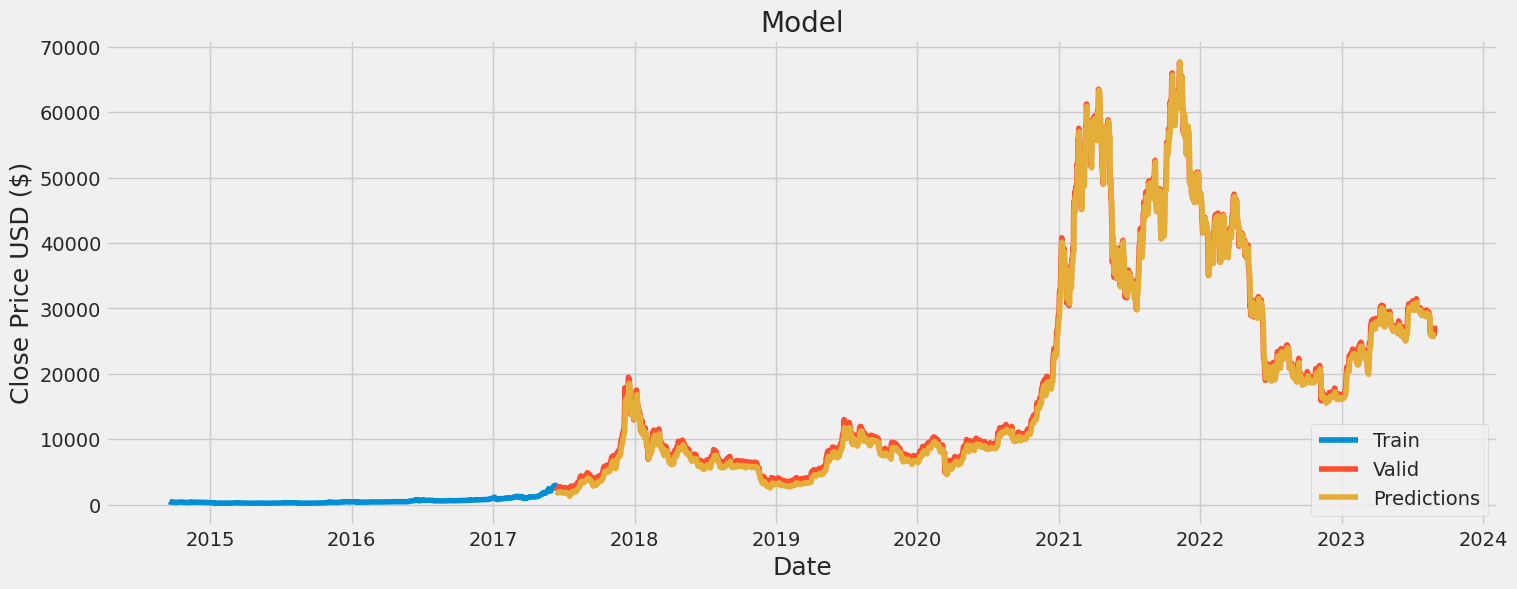

In [ ]:

def plot_data(data, predictions):
  # Plot the data
  train = data[:training_data_len]
  valid = data[training_data_len:]
  valid['Predictions'] = predictions
  # Visualize the data
  plt.figure(figsize=(16,6))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
  plt.show()

plot_data(data, predictions)

In [ ]:
scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.38450928],
       [0.38475349],
       [0.40342026]])

In [ ]:
def predict_data(data, date):
  # Convert the dataframe to a numpy array
  dataset = data.values

  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(dataset)



  total_predictions = np.array([])
  day_count = (date - datetime.now()).days
  print("days: " + str(day_count))

  training_data_len = day_count

  x_test = scaled_data
  x_test = np.array(x_test)
  x_test = np.expand_dims(x_test, axis=-1)

  for i in range(training_data_len):

    data_for_prediction = np.expand_dims(x_test[-60:, 0], axis=0)
    print(data_for_prediction.shape)

    predictions = model.predict(data_for_prediction)

    predictions = np.expand_dims(predictions, axis=0)
    x_test = np.vstack((x_test, predictions))
#
    print(predictions)
    print(x_test.shape, predictions.shape)
#
    predictions = scaler.inverse_transform(predictions[0])
    print(predictions.shape)
    total_predictions = np.hstack((total_predictions, np.squeeze(predictions, axis=-1)))

  return total_predictions




In [ ]:
current_date = datetime.now()
end_date = datetime(2024, 8, 31)

prediction = predict_data(data, end_date)

days: 367
(1, 60, 1)
1/1 [==============================] - 0s 38ms/step
[[[0.39386466]]]
(3270, 1, 1) (1, 1, 1)
(1, 1)
(1, 60, 1)
1/1 [==============================] - 0s 34ms/step
[[[0.39107046]]]
(3271, 1, 1) (1, 1, 1)
(1, 1)
(1, 60, 1)
1/1 [==============================] - 0s 32ms/step
[[[0.38706747]]]
(3272, 1, 1) (1, 1, 1)
(1, 1)
(1, 60, 1)
1/1 [==============================] - 0s 33ms/step
[[[0.38280034]]]
(3273, 1, 1) (1, 1, 1)
(1, 1)
(1, 60, 1)
1/1 [==============================] - 0s 35ms/step
[[[0.3785269]]]
(3274, 1, 1) (1, 1, 1)
(1, 1)
(1, 60, 1)
1/1 [==============================] - 0s 35ms/step
[[[0.3743506]]]
(3275, 1, 1) (1, 1, 1)
(1, 1)
(1, 60, 1)
1/1 [==============================] - 0s 38ms/step
[[[0.37029332]]]
(3276, 1, 1) (1, 1, 1)
(1, 1)
(1, 60, 1)
1/1 [==============================] - 0s 44ms/step
[[[0.3663395]]]
(3277, 1, 1) (1, 1, 1)
(1, 1)
(1, 60, 1)
1/1 [==============================] - 0s 36ms/step
[[[0.3624615]]]
(3278, 1, 1) (1, 1, 1)
(1, 1)
(1, 

In [ ]:
prediction

array([ 26720.140625  ,  26531.84375   ,  26262.0859375 ,  25974.53125   ,
        25686.54882812,  25405.11328125,  25131.69921875,  24865.25585938,
        24603.921875  ,  24345.94140625,  24089.95898438,  23835.08398438,
        23580.78320312,  23326.75195312,  23072.81640625,  22818.84179688,
        22564.68945312,  22310.21875   ,  22055.26171875,  21799.64648438,
        21543.20117188,  21285.75585938,  21027.16015625,  20767.2890625 ,
        20506.03320312,  20243.30078125,  19979.02929688,  19713.16015625,
        19445.65820312,  19176.5       ,  18905.66210938,  18633.14257812,
        18358.92773438,  18083.0234375 ,  17805.43359375,  17526.15429688,
        17245.19726562,  16962.56640625,  16678.26757812,  16392.30273438,
        16104.67578125,  15815.39648438,  15524.46777344,  15231.88964844,
        14937.66796875,  14641.80664062,  14344.30566406,  14045.17285156,
        13744.40917969,  13442.01660156,  13137.99902344,  12832.3671875 ,
        12525.1171875 ,  

In [ ]:
prediction = np.expand_dims(prediction, axis=-1)
prediction

array([[ 26720.140625  ],
       [ 26531.84375   ],
       [ 26262.0859375 ],
       [ 25974.53125   ],
       [ 25686.54882812],
       [ 25405.11328125],
       [ 25131.69921875],
       [ 24865.25585938],
       [ 24603.921875  ],
       [ 24345.94140625],
       [ 24089.95898438],
       [ 23835.08398438],
       [ 23580.78320312],
       [ 23326.75195312],
       [ 23072.81640625],
       [ 22818.84179688],
       [ 22564.68945312],
       [ 22310.21875   ],
       [ 22055.26171875],
       [ 21799.64648438],
       [ 21543.20117188],
       [ 21285.75585938],
       [ 21027.16015625],
       [ 20767.2890625 ],
       [ 20506.03320312],
       [ 20243.30078125],
       [ 19979.02929688],
       [ 19713.16015625],
       [ 19445.65820312],
       [ 19176.5       ],
       [ 18905.66210938],
       [ 18633.14257812],
       [ 18358.92773438],
       [ 18083.0234375 ],
       [ 17805.43359375],
       [ 17526.15429688],
       [ 17245.19726562],
       [ 16962.56640625],
       [ 166

In [ ]:


i = 0
data_list = []
current_date = datetime.now()
day_count = (end_date - current_date).days
print(day_count)
for i in range(day_count):
    current_date += timedelta(days=1)  # increment the date by one day
    _data = {
        'Date': current_date.date(),
        'Close': prediction[i, 0]
    }
    print(current_date.strftime('%Y-%m-%d'), prediction[i, :], i)  # print date as a string in 'YYYY-MM-DD' format
    data_list.append(_data)
    #i += 1
future_price = pd.DataFrame(data_list)
future_price.set_index('Date', inplace=True)

future_price.head()


367
2023-08-30 [26720.140625] 0
2023-08-31 [26531.84375] 1
2023-09-01 [26262.0859375] 2
2023-09-02 [25974.53125] 3
2023-09-03 [25686.54882812] 4
2023-09-04 [25405.11328125] 5
2023-09-05 [25131.69921875] 6
2023-09-06 [24865.25585938] 7
2023-09-07 [24603.921875] 8
2023-09-08 [24345.94140625] 9
2023-09-09 [24089.95898438] 10
2023-09-10 [23835.08398438] 11
2023-09-11 [23580.78320312] 12
2023-09-12 [23326.75195312] 13
2023-09-13 [23072.81640625] 14
2023-09-14 [22818.84179688] 15
2023-09-15 [22564.68945312] 16
2023-09-16 [22310.21875] 17
2023-09-17 [22055.26171875] 18
2023-09-18 [21799.64648438] 19
2023-09-19 [21543.20117188] 20
2023-09-20 [21285.75585938] 21
2023-09-21 [21027.16015625] 22
2023-09-22 [20767.2890625] 23
2023-09-23 [20506.03320312] 24
2023-09-24 [20243.30078125] 25
2023-09-25 [19979.02929688] 26
2023-09-26 [19713.16015625] 27
2023-09-27 [19445.65820312] 28
2023-09-28 [19176.5] 29
2023-09-29 [18905.66210938] 30
2023-09-30 [18633.14257812] 31
2023-10-01 [18358.92773438] 32
2023-

,Close
Date,
2023-08-30,26720.140625
2023-08-31,26531.843750
2023-09-01,26262.085938
2023-09-02,25974.531250
2023-09-03,25686.548828


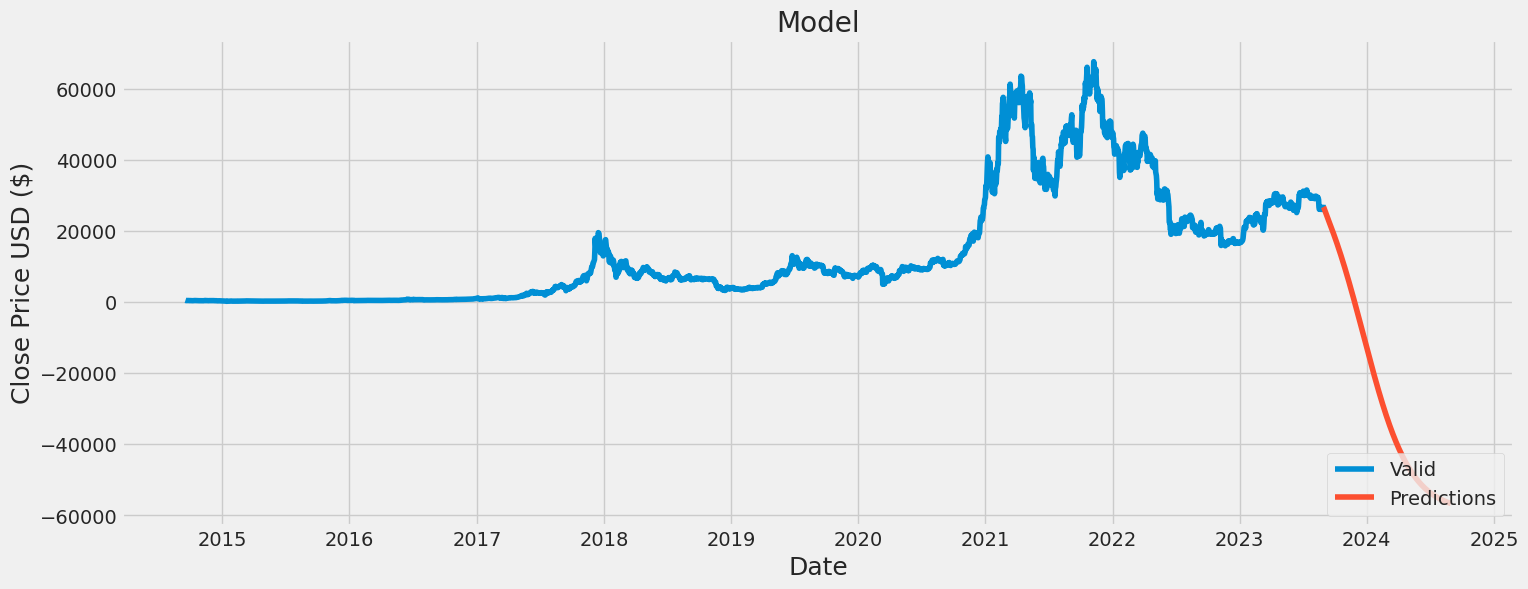

In [ ]:
def plot_data_future(data, predictions):
  # Plot the data
  old = data[:]
  future = predictions[:]
  # Visualize the data
  plt.figure(figsize=(16,6))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(old['Close'])
  plt.plot(future['Close'])
  plt.legend(['Valid', 'Predictions'], loc='lower right')
  plt.show()

plot_data_future(data, future_price)